In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import time

In [2]:
api_key = "6bb7f55c691d1bdff841fdc67934b3b8"

### Find Song

In [3]:
def find_song(artist, track):
    results = []
    artists_list = []
    params_get_artists = {
        "method" : "artist.search",
        "format" : "json",
        "limit" : 100,
        "artist" : artist,
        "api_key" : api_key
    }
    artists = requests.get('http://ws.audioscrobbler.com/2.0/', params=params_get_artists)
    for artist in artists.json()['results']['artistmatches']['artist']:
            artists_list.append(artist['name'])

    tracks_list = []
    params_get_tracks = {
        "method" : "track.search",
        "format" : "json",
        "limit" : 100,
        "track" : track,
        "api_key" : api_key
    }
    tracks = requests.get('http://ws.audioscrobbler.com/2.0/', params=params_get_tracks)
    for track in tracks.json()['results']['trackmatches']['track']:
        if track['artist'] in artists_list:
            return_track = track['name']
            return_artist = track['artist']
            results.append((return_artist, return_track))
    if len(results) > 0:
        return results
    return('Could not find track. Please search again.')

## Get Artist Info

In [4]:
def get_artist_info(result_artist):
    params_artist_info = {
    "method" : "artist.getInfo",
    "format" : "json",
    "artist" : result_artist,
    "api_key" : api_key
}
    artist_info = requests.get('http://ws.audioscrobbler.com/2.0/', params=params_artist_info)
    content = artist_info.json()['artist']['bio']['content']
    listeners = int(artist_info.json()['artist']['stats']['listeners'])
    playcount = int(artist_info.json()['artist']['stats']['playcount'])
    return (listeners, playcount, content)

## Get Track Info

In [5]:
def get_track_info(result_artist, result_track):
    params_track_info = {
    "method" : "track.getInfo",
    "format" : "json",
    "artist" : result_artist,
    "track" : result_track,
    "api_key" : api_key
}
    track_info = requests.get('http://ws.audioscrobbler.com/2.0/', params=params_track_info)
    track_listeners = int(track_info.json()['track']['listeners'])
    track_playcounts = int(track_info.json()['track']['playcount'])
    track_duration = int(track_info.json()['track']['duration'])
    try:
        track_content = track_info.json()['track']['wiki']['content']
    except:
        track_content = 'Track information unavailable.'
    try:
        track_album = track_info.json()['track']['album']['title']
    except:
        track_album = 'Album unavailable.'
    return (track_duration, track_listeners, track_playcounts, track_album, track_content)

## Get Similar Tracks

In [6]:
def get_similar_tracks(result_artist, result_track):
    params_get_similar_tracks = {
        "method" : "track.getSimilar",
        "format" : "json",
        "artist" : result_artist,
        "track" : result_track,
        "api_key" : api_key
    }
    df = pd.DataFrame(columns = ['Info', 'Album', 'Duration', 'Listeners', 'Playcount'])
    similar_tracks = requests.get('http://ws.audioscrobbler.com/2.0/', params=params_get_similar_tracks)
    counter = 1
    for sim_track in similar_tracks.json()['similartracks']['track'][:10]:
        return_similar_track = sim_track['name']
        return_similar_artist = sim_track['artist']['name']
        sim_track_duration, sim_track_listeners, sim_track_playcounts, sim_track_album, sim_track_content = get_track_info(return_similar_artist, return_similar_track)
        sim_df = pd.DataFrame({'Info' : [str(counter) + '. ' + return_similar_track + ' \n ' + return_similar_artist],
                               'Album' : [sim_track_album], 
                               'Duration' : [sim_track_duration], 
                               'Listeners' : [sim_track_listeners], 
                               'Playcount' : [sim_track_playcounts]})
        df = df.append(sim_df, ignore_index= True)
        counter += 1
    return df

## Get Similar Artists

In [7]:
def get_artist_counts(result_artist):
    params_artist_counts = {
    "method" : "artist.getInfo",
    "format" : "json",
    "artist" : result_artist,
    "api_key" : api_key
}
    artist_info = requests.get('http://ws.audioscrobbler.com/2.0/', params=params_artist_counts)
    listeners = int(artist_info.json()['artist']['stats']['listeners'])
    playcount = int(artist_info.json()['artist']['stats']['playcount'])
    return (listeners, playcount)

In [8]:
def get_similar_artists(result_artist):
    params_get_similar_artists = {
        "method" : "artist.getSimilar",
        "format" : "json",
        "artist" : result_artist,
        "api_key" : api_key
    }
    similar_artists = requests.get('http://ws.audioscrobbler.com/2.0/', params=params_get_similar_artists)
    df_sim_artists = pd.DataFrame(columns = ['Info', 'Listeners', 'Playcount'])
    counter = 1
    for artist in similar_artists.json()['similarartists']['artist'][:10]:
        return_similar_artist_art = artist['name']
        sim_art_listeners, sim_art_playcount = get_artist_counts(return_similar_artist_art)
        df_sim_artists_art = pd.DataFrame({'Info' : [str(counter) + '. ' + return_similar_artist_art],
                                         'Listeners' : [sim_art_listeners],
                                         'Playcount' : [sim_art_playcount]})
        df_sim_artists = df_sim_artists.append(df_sim_artists_art, ignore_index = True)
        counter += 1
    return df_sim_artists

## Results

In [10]:
results = find_song(artist = 'dylan', track = "watchtower")
result_artist = results[0][0]
result_track = results[0][1]
print(result_artist)
print(result_track)

Bob Dylan
All Along the Watchtower


In [11]:
listeners, playcount, artist_info = get_artist_info(result_artist)
print(listeners)
print(playcount)
print(artist_info)

2780179
164139085
Bob Dylan (born Robert Allen Zimmerman on May 24, 1941 in Duluth, Minnesota, United States) is an American musician, poet and artist whose position in popular culture is unique.

Dylan started his musical odyssey in 1959 when he began playing in Dinkytown, Minneapolis while attending the University of Minnesota. Shortly after starting to play he changed his stage name to Bob Dylan, after being influenced by the poetry of Dylan Thomas before legally changing his name in 1962. 

Much of his best known work is from the 1960s, when he became an informal documentarian and reluctant figurehead of American unrest, promoted by Joan Baez. Some of his songs, such as "Blowin' in the Wind" and "The Times They Are A-Changin'", became anthems of the anti-war and civil rights movements, with Joan Baez and Dylan singing together at the March on Washington in 1963. However he later became disenchanted with the civil liberty protest scene, feeling that he had been used by them.

His al

In [12]:
track_duration, track_listeners, track_playcounts, track_album, track_content = get_track_info(result_artist, result_track)
print(track_duration)
print(track_listeners)
print(track_playcounts)
print(track_album)
print(track_content)

216000
417120
2243890
John Wesley Harding
"All Along the Watchtower" is a folk song written and recorded by singer-songwriter Bob Dylan. Dylan has performed this song more often in concert than any of his other compositions. It has been estimated that as of the end of 2007, Dylan had sung the song 1,748 times on stage. It has been covered by other artists in different genres, most notably by The Jimi Hendrix Experience. <a href="http://www.last.fm/music/Bob+Dylan/_/All+Along+the+Watchtower">Read more on Last.fm</a>. User-contributed text is available under the Creative Commons By-SA License; additional terms may apply.


In [13]:
sim_tracks_df = get_similar_tracks(result_artist, result_track)

In [18]:
sim_tracks_df

,Info,Album,Duration,Listeners,Playcount
0,1. I'll Be Your Baby Tonight \n Bob Dylan,John Wesley Harding,158000,177814,677760
1,2. Just Like a Woman \n Bob Dylan,Blonde on Blonde,290000,472624,2368366
2,3. Heart of Gold \n Neil Young,Harvest,188000,669661,4041933
3,4. Old Man \n Neil Young,Harvest,202000,474474,2698054
4,5. The Weight \n The Band,The Best of the Band,274000,450936,2036458
5,6. The Boxer \n Simon & Garfunkel,Bridge Over Troubled Water,308000,613941,3355002
6,7. For What It's Worth \n Buffalo Springfield,Retrospective: The Best of Buffalo Springfield,159000,748944,4179661
7,8. The Sound of Silence \n Simon & Garfunkel,100 Movie Hits,187000,1012155,7537184
8,9. The Night They Drove Old Dixie Down \n The ...,The Band,210000,207520,804344
9,10. Bad Moon Rising \n Creedence Clearwater Re...,Platinum,138000,885036,4948114


In [21]:
sim_track_name_1 = sim_tracks_df['Info'][0]
sim_track_album_1 = sim_tracks_df['Album'][0]
sim_track_duration_1 = sim_tracks_df['Duration'][0]
sim_track_listeners_1 = sim_tracks_df['Listeners'][0]
sim_track_playcount_1 = sim_tracks_df['Playcount'][0]

sim_track_name_2 = sim_tracks_df['Info'][1]
sim_track_album_2 = sim_tracks_df['Album'][1]
sim_track_duration_2 = sim_tracks_df['Duration'][1]
sim_track_listeners_2 = sim_tracks_df['Listeners'][1]
sim_track_playcount_2 = sim_tracks_df['Playcount'][1]

sim_track_name_3 = sim_tracks_df['Info'][2]
sim_track_album_3 = sim_tracks_df['Album'][2]
sim_track_duration_3 = sim_tracks_df['Duration'][2]
sim_track_listeners_3 = sim_tracks_df['Listeners'][2]
sim_track_playcount_3 = sim_tracks_df['Playcount'][2]

sim_track_name_4 = sim_tracks_df['Info'][3]
sim_track_album_4 = sim_tracks_df['Album'][3]
sim_track_duration_4 = sim_tracks_df['Duration'][3]
sim_track_listeners_4 = sim_tracks_df['Listeners'][3]
sim_track_playcount_4 = sim_tracks_df['Playcount'][3]

sim_track_name_5 = sim_tracks_df['Info'][4]
sim_track_album_5 = sim_tracks_df['Album'][4]
sim_track_duration_5 = sim_tracks_df['Duration'][4]
sim_track_listeners_5 = sim_tracks_df['Listeners'][4]
sim_track_playcount_5 = sim_tracks_df['Playcount'][4]

sim_track_name_6 = sim_tracks_df['Info'][5]
sim_track_album_6 = sim_tracks_df['Album'][5]
sim_track_duration_6 = sim_tracks_df['Duration'][5]
sim_track_listeners_6 = sim_tracks_df['Listeners'][5]
sim_track_playcount_6 = sim_tracks_df['Playcount'][5]

sim_track_name_7 = sim_tracks_df['Info'][6]
sim_track_album_7 = sim_tracks_df['Album'][6]
sim_track_duration_7 = sim_tracks_df['Duration'][6]
sim_track_listeners_7 = sim_tracks_df['Listeners'][6]
sim_track_playcount_7 = sim_tracks_df['Playcount'][6]

sim_track_name_8 = sim_tracks_df['Info'][7]
sim_track_album_8 = sim_tracks_df['Album'][7]
sim_track_duration_8 = sim_tracks_df['Duration'][7]
sim_track_listeners_8 = sim_tracks_df['Listeners'][7]
sim_track_playcount_8 = sim_tracks_df['Playcount'][7]

sim_track_name_9 = sim_tracks_df['Info'][8]
sim_track_album_9 = sim_tracks_df['Album'][8]
sim_track_duration_9 = sim_tracks_df['Duration'][8]
sim_track_listeners_9 = sim_tracks_df['Listeners'][8]
sim_track_playcount_9 = sim_tracks_df['Playcount'][8]

sim_track_name_10 = sim_tracks_df['Info'][9]
sim_track_album_10 = sim_tracks_df['Album'][9]
sim_track_duration_10 = sim_tracks_df['Duration'][9]
sim_track_listeners_10 = sim_tracks_df['Listeners'][9]
sim_track_playcount_10 = sim_tracks_df['Playcount'][9]

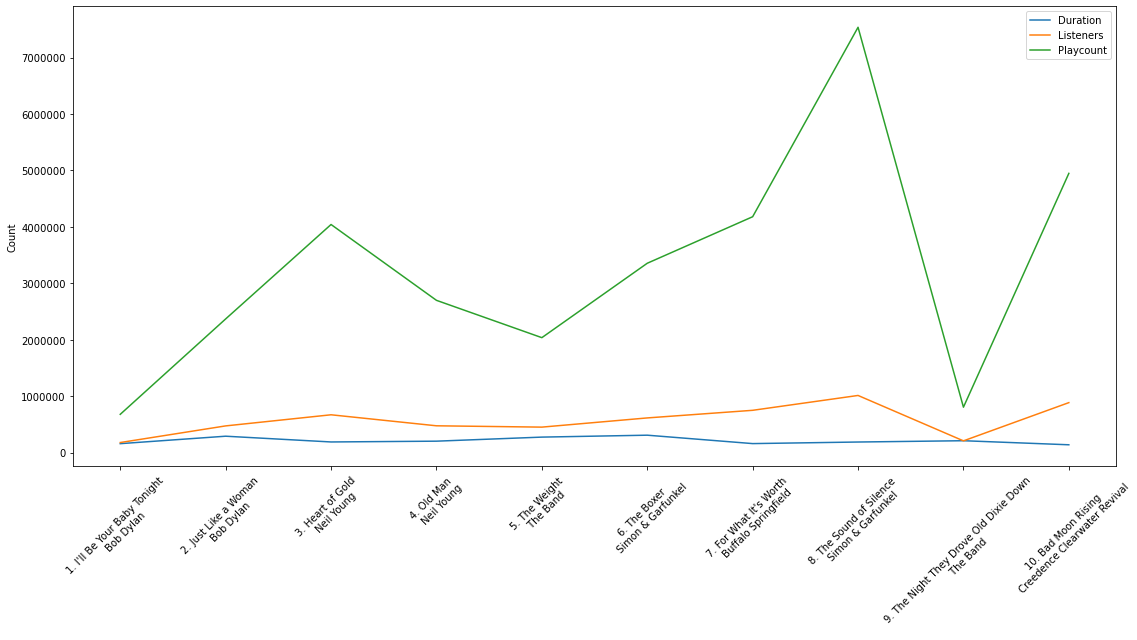

In [22]:
plt.figure(figsize = (16, 9))
plt.plot(sim_tracks_df['Info'], sim_tracks_df['Duration'], label = 'Duration')
plt.plot(sim_tracks_df['Info'], sim_tracks_df['Listeners'], label = 'Listeners')
plt.plot(sim_tracks_df['Info'], sim_tracks_df['Playcount'], label = 'Playcount')
plt.xticks(rotation = 45)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Count')
plt.legend()
plt.tight_layout();

In [23]:
sim_art_df = get_similar_artists(result_artist)

In [24]:
sim_art_df

,Info,Listeners,Playcount
0,1. Bob Dylan and The Band,327884,3693261
1,2. Bob Dylan & Johnny Cash,117787,888798
2,3. Neil Young,1846275,68680232
3,4. The Band,994344,16225131
4,5. Van Morrison,1738459,35215682
5,6. Bruce Springsteen,2275366,84897074
6,7. Neil Young & Crazy Horse,444573,7067450
7,8. Joan Baez,617937,7421524
8,9. Woody Guthrie,397237,4422860
9,10. Leonard Cohen,1476217,50826382


In [25]:
sim_art_name_1 = sim_art_df['Info'][0]
sim_art_listeners_1 = sim_art_df['Listeners'][0]
sim_art_playcount_1 = sim_art_df['Playcount'][0]

sim_art_name_2 = sim_art_df['Info'][1]
sim_art_listeners_2 = sim_art_df['Listeners'][1]
sim_art_playcount_2 = sim_art_df['Playcount'][1]

sim_art_name_3 = sim_art_df['Info'][2]
sim_art_listeners_3 = sim_art_df['Listeners'][2]
sim_art_playcount_3 = sim_art_df['Playcount'][2]

sim_art_name_4 = sim_art_df['Info'][3]
sim_art_listeners_4 = sim_art_df['Listeners'][3]
sim_art_playcount_4 = sim_art_df['Playcount'][3]

sim_art_name_5 = sim_art_df['Info'][4]
sim_art_listeners_5 = sim_art_df['Listeners'][4]
sim_art_playcount_5 = sim_art_df['Playcount'][4]

sim_art_name_6 = sim_art_df['Info'][5]
sim_art_listeners_6 = sim_art_df['Listeners'][5]
sim_art_playcount_6 = sim_art_df['Playcount'][5]

sim_art_name_7 = sim_art_df['Info'][6]
sim_art_listeners_7 = sim_art_df['Listeners'][6]
sim_art_playcount_7 = sim_art_df['Playcount'][6]

sim_art_name_8 = sim_art_df['Info'][7]
sim_art_listeners_8 = sim_art_df['Listeners'][7]
sim_art_playcount_8 = sim_art_df['Playcount'][7]

sim_art_name_9 = sim_art_df['Info'][8]
sim_art_listeners_9 = sim_art_df['Listeners'][8]
sim_art_playcount_9 = sim_art_df['Playcount'][8]

sim_art_name_10 = sim_art_df['Info'][9]
sim_art_listeners_10 = sim_art_df['Listeners'][9]
sim_art_playcount_10 = sim_art_df['Playcount'][9]

,Info,Listeners,Playcount
0,1. Bob Dylan and The Band,327878,3693166
1,2. Bob Dylan & Johnny Cash,117781,888735
2,3. Neil Young,1846081,68668926
3,4. The Band,994242,16222469
4,5. Van Morrison,1738301,35210607
5,6. Bruce Springsteen,2275168,84884816
6,7. Neil Young & Crazy Horse,444566,7066915
7,8. Leonard Cohen,1476082,50818705
8,9. Woody Guthrie,397207,4422240
9,10. Joan Baez,617874,7420277


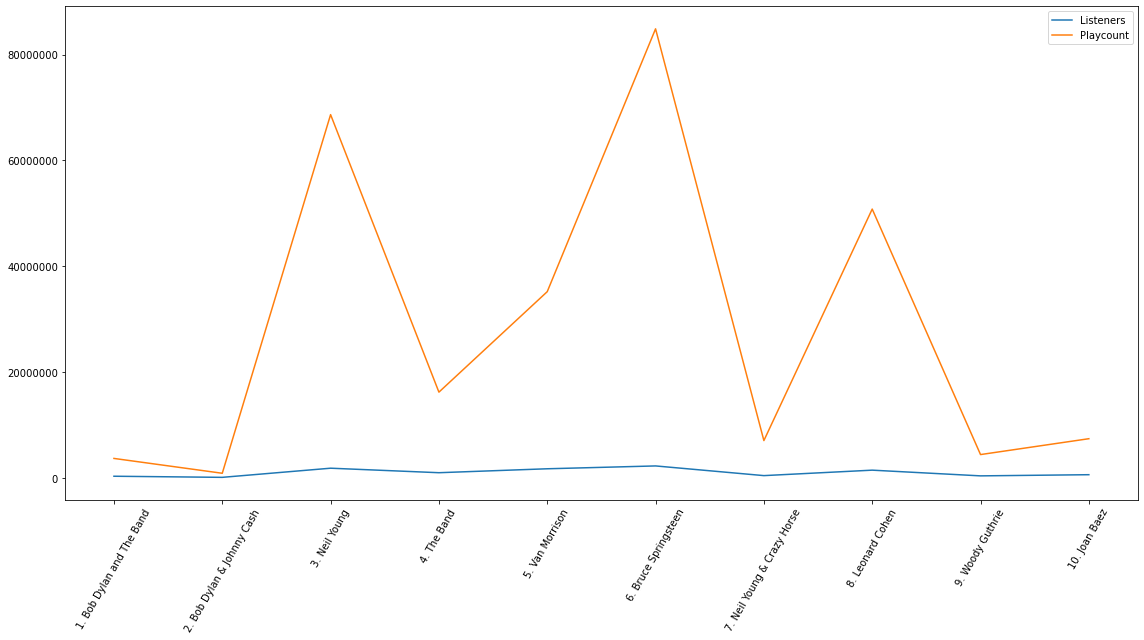

In [20]:
plt.figure(figsize = (16, 9))
plt.plot(sim_art_df['Info'], sim_art_df['Listeners'], label = 'Listeners')
plt.plot(sim_art_df['Info'], sim_art_df['Playcount'], label = 'Playcount')
plt.xticks(rotation = 60)
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.tight_layout()